# Testing different ways of multiplying matices in Python

Python's time module provides various time-related functions. We are going to utilize it in order to calculate how long does it take to perform operations.

In [0]:
import time

In [0]:
# 3x3 matrix
X = [[1,1,1],
    [1,1,1],
    [1,1,1]]
# 3x4 matrix
Y = [[1,1,1,1],
    [1,1,1,1],
    [1,1,1,1]]

Define matrix initializing function using list comprehension

In [0]:
def matrix_initializing(Rows, Columns):
    # using list comprehension  
    # to initializing matrix 
    matrix = [ [ 1 for i in range(Rows) ] for j in range(Columns) ] 
    return matrix

Initialize matricies

In [0]:
X = matrix_initializing(500, 500)
Y = matrix_initializing(500, 500)


Initialize list to track computational speed

In [0]:
performance = []

Multiply two matrices using for loop

In [6]:
# result is 3x4
result = matrix_initializing(500, 500)
start_time = time.time()         
# iterate through rows of X
for i in range(len(X)):
   # iterate through columns of Y
   for j in range(len(Y[0])):
       # iterate through rows of Y
       for k in range(len(Y)):
           result[i][j] += X[i][k] * Y[k][j]
time_cpu = time.time() - start_time

performance.append(time_cpu)

print("Time on CPU: {:.5f}s ".format(time_cpu))

Time on CPU: 30.98964s 


We are going to multiply two matrices using list comprehision

In [7]:
# Program to multiply two matrices using list comprehension
# 3x3 matrix

start_time = time.time()
result = [[sum(a*b for a,b in zip(X_row,Y_col)) for Y_col in zip(*Y)] for X_row in X]
time_cpu = time.time() - start_time
performance.append(time_cpu)

print("Time on CPU: {:.5f}s ".format(time_cpu))


Time on CPU: 9.06592s 


Numpy is package for scientific computing in Python.

In [0]:
import numpy as np

Matrix multiplication using numpy

In [0]:
#converting lists into numpy array
X_numpy = np.array(X)
Y_numpy = np.array(Y)

In [10]:
# Do the calculation on cpu (default)
start_time = time.time()
  # Matrix multiplication (for benchmark purpose)
results = np.dot(X_numpy, Y_numpy)

time_cpu = time.time() - start_time

performance.append(time_cpu)

print("Time on CPU: {:.5f}s ".format(time_cpu))

Time on CPU: 0.16563s 


Pytorch is a Python based scientific computing package. It has ability to perform parallel computations faster by utilizing parallel architecture of GPUs

In [0]:
import torch as th

Multiply two matrices mm pytorch

In [0]:
#Turning numpy arrays into pytorch tensors›
X_tensor = th.FloatTensor(X)
Y_tensor = th.FloatTensor(Y)

In [13]:
if th.cuda.is_available():

  # Do the calculation on cpu (default)
  start_time = time.time()
  # Matrix multiplication (for benchmark purpose)
  results = th.mm(X_tensor, Y_tensor)

  time_cpu = time.time() - start_time

  # Do the same calculation but on the gpu
  # First move tensors to gpu
  x = X_tensor.to("cuda")
  y = Y_tensor.to("cuda")
  start_time = time.time()
  # Matrix multiplication (for benchmark purpose)
  results = th.mm(x, y)
  
  time_gpu = time.time() - start_time
  
  performance.append(time_gpu)
  print("Time on CPU: {:.5f}s \t Time on GPU: {:.5f}s".format(time_cpu, time_gpu))
  print("Speed up: Computation was {:.0f}X faster on GPU!".format(time_cpu / time_gpu))
  
else:
  print("You need to enable GPU accelaration in colab (runtime->change runtime type)")

Time on CPU: 0.05387s 	 Time on GPU: 0.00107s
Speed up: Computation was 51X faster on GPU!


In [14]:
print(performance)

[30.989636659622192, 9.065919160842896, 0.16563010215759277, 0.001065969467163086]


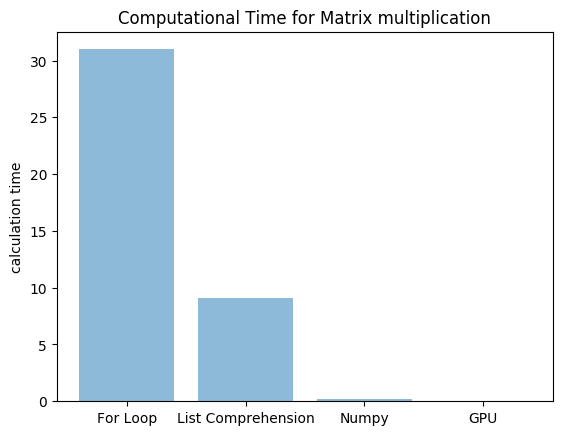

In [15]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('For Loop', 'List Comprehension', 'Numpy', 'GPU')
y_pos = np.arange(len(objects))


plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('calculation time')
plt.title('Computational Time for Matrix multiplication')

plt.show()